# 이미지 밝기 처리

픽셀값은 255에 가까울수록 밝고, 0에 가까울수록 어둡다.

이 점을 활용하여 픽셀 값에 값을 더하거나 빼줌으로서 이미지의 밝기 조절이 가능

입력 이미지의 특정 좌표 픽셀 값을 변경하여 출력 이미지 밝기 조절을 할 때 주의할 점은,

0 ~255 범위를 벗어나면 초과나 마이너스된 값만 반영되므로

출력값이 0보다 작을 때는 0으로 반환하고, 255보다 클 때는 255로 출력하는 연산처리를 해야 한다

Saturation연산은 한계값을 정하고 그 값을 벗어나는 경우는 모두 특정 값으로 계산하는 방식 입니다.
이미지에서는 0이하는 모두 0, 255이상은 모두 255로 표현하는 것입니다.
modulo연산은 a와 b는 n으로 나눈 나머지 값이 같다라는 의미입니다.
시계를 예로 들면 2와 14는 12로 나눈 나머지가 2로 동일합니다. 이미지에서는 연산의 결과가 256보다 큰 경우는 256으로 나눈 나머지 값으로 결정

In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

Saving flower.jpg to flower (1).jpg


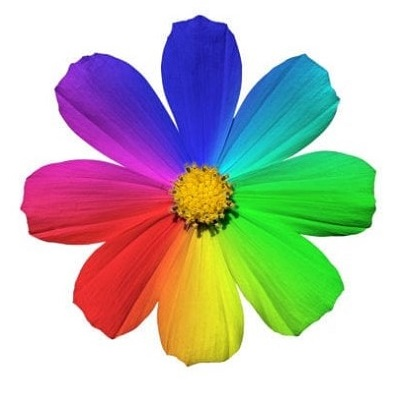

In [4]:
file = files.upload()
img = cv2.imread("flower.jpg") 
cv2_imshow(img) 

Saving flower.jpg to flower (2).jpg


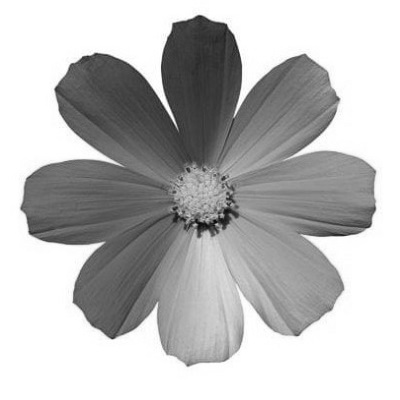

In [10]:
file = files.upload()
gray_img = cv2.imread("flower.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(gray_img) 

# cv2.add()

영상의 밝기 조절을 위한 영상의 덧셈 연산

cv2.add(src1, src2, dst=None, mask=None, dtype=None) -> dst

src1 : (입력) 첫 번째 영상 또는 스칼라

src2 : (입력) 두 번째 영상 또는 스칼라

dst : (출력) 덧셈 연산의 결과 영상

mask : 마스크 영상

dtype : 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등

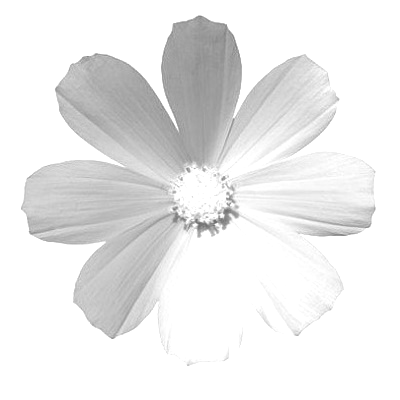

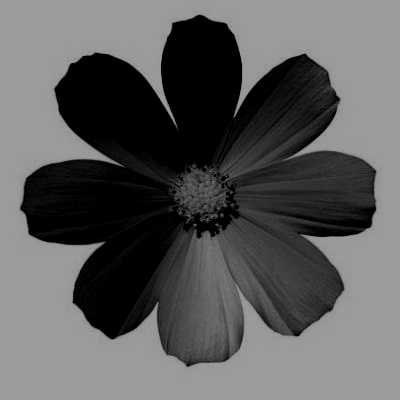

In [12]:
# gray image cv2.add(),cv2.subtract()  적용
l_gray = cv2.add(gray_img,100)
d_gray = cv2.subtract(gray_img,100) 
cv2_imshow(l_gray)
cv2_imshow(d_gray)

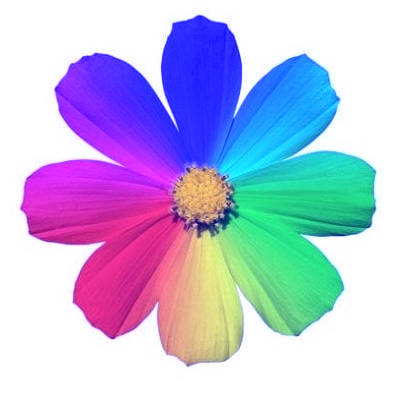

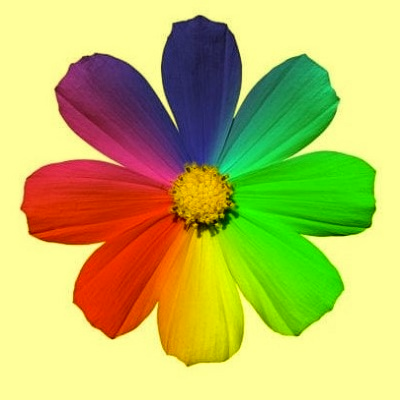

In [23]:
# color image cv2.add(),cv2.subtract() 잘못된 적용 예시
l_color = cv2.add(img,100)  
d_color = cv2.subtract(img,100) 

cv2_imshow(l_color)
cv2_imshow(d_color)

color 이미지에 gray 이미지처럼 함수를 적용하면
채널이 분리되어 적용 된다.(아래 참고)

add()는 bgr에서 blue채널, subtract()는 red채널만 적용된 결과가 나타남

채널 전체에 적용되도록 배열을 생성해서 함수 재적용함

In [19]:
# 부분 채널에만 적용됨 확인할 수 있음
x = 100
y = 100
add = cv2.add(img,100)
sub = cv2.subtract(img,100) 

print('img',img[y,x])
print('add',add[y,x])
print('sub',sub[y,x])

img [188  43 121]
add [255  43 121]
sub [ 88  43 121]


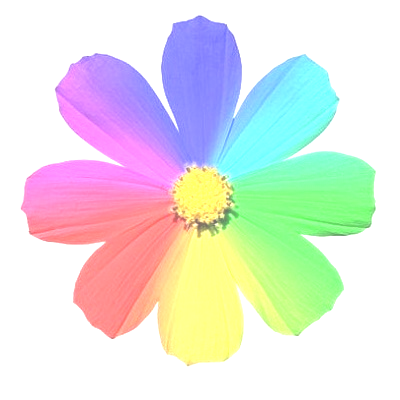

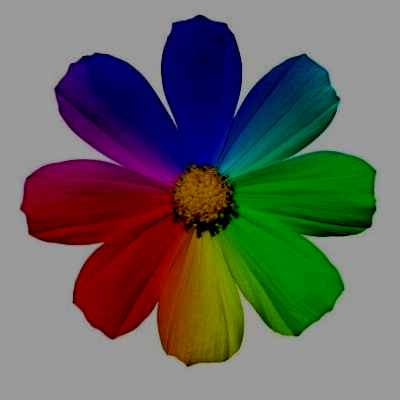

In [22]:
# 배열을 생성해서 함수 재적용
val = 100 
arr = np.full(img.shape, (val, val, val) ,dtype=np.uint8)
l_color2 = cv2.add(img,arr)  
d_color2 = cv2.subtract(img,arr) 

cv2_imshow(l_color2)
cv2_imshow(d_color2)

In [ ]:
gray_img 

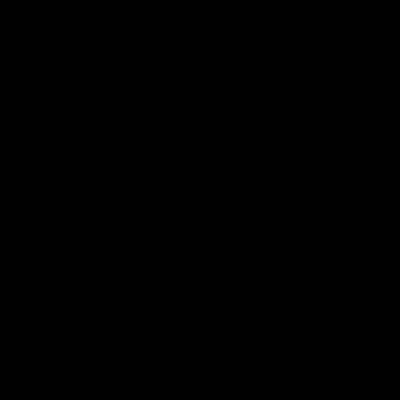

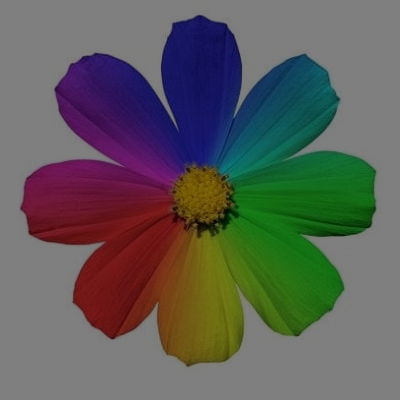

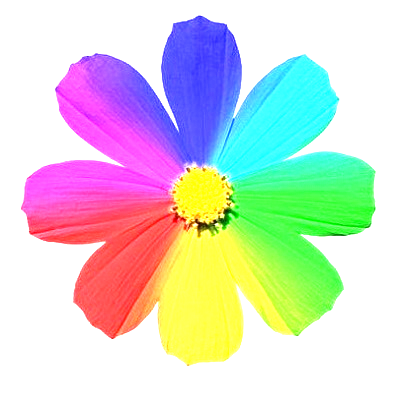

In [ ]:
def imgBrightness (img, num): # num = 명암비
    res = img.copy()
    res = img.astype('int64')
    res = np.clip(res * num, 0, 255)
    res = res.astype('uint8')
    return res

img1 = imgBrightness(img,-1) # 0 이하는 완전 검정, 1은 원본 그대로 출력
cv2_imshow(img1)
img2 = imgBrightness(img,0.5) # 0과 1사이의 값을 인자로 넣으면 어둡게 출력
cv2_imshow(img2)
img3 = imgBrightness(img,2)  # 1이상의 값을 인자로 넣으면 밝게 출력
cv2_imshow(img3)